In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [4]:
import numpy
import pandas
import matplotlib

In [5]:
a = [1, 4, 5, 7]
numpy.mean(a)


4.25

In [6]:
numpy.min(a)

1

In [7]:
numpy.max(a)

7

In [9]:
numpy.median(a)

4.5

In [10]:
numpy.random(a)

TypeError: 'module' object is not callable

In [11]:
numpy.random(1, 10)

TypeError: 'module' object is not callable

In [13]:
import numpy as np
array = np.array([[1, 2, 3], [4, 5, 6]])


In [14]:
array

array([[1, 2, 3],
       [4, 5, 6]])

In [16]:
type(array)

numpy.ndarray

In [17]:
np.size(array)

6

In [18]:
import numpy as np
import pandas as pd
import matplotlib as plt


In [19]:
import matplotlib.pyplot as plt

In [22]:
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1.1, 0.1], [0.1, 1.0]])
mean_02 = np.array([6.0, 6.0])
cov_02 = np.array([[1.1, 0.1], [0.1, 1.0]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)


In [30]:
print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


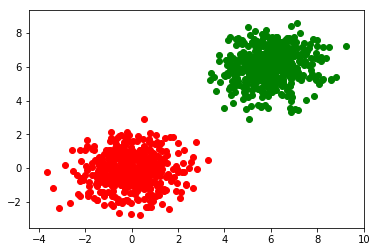

In [35]:
for ix in list(range(dist_01.shape[0])):
    plt.scatter(dist_01[ix, 0], dist_01[ix, 1], c = 'r')
    plt.scatter(dist_02[ix, 0], dist_02[ix, 1], c = 'g')
plt.show()

In [55]:
rows   = dist_01.shape[0] + dist_02.shape[0]
cols   = dist_01.shape[1] + 1
data = np.zeros((rows, cols))
print(data.shape)

(1000, 3)


In [57]:
data[:dist_01.shape[0],:-1] = dist_01
data[dist_01.shape[0]:rows, :-1] = dist_02

data[dist_01.shape[0]:rows, -1] = 1

In [59]:
split_factor = 0.85
split = int(data.shape[0]*split_factor)
print(split)

850


In [71]:
train_data = data[:split]
test_data = data[split:]

X_train = train_data[:, : - 1]
X_test = test_data[:, : - 1]

Y_train = train_data[:, - 1]
Y_test = test_data[:, - 1]

print(x_test.shape)
print(x_train.shape)

(150, 2)
(850, 2)


In [70]:
def distance(p1, p2):
    dist = np.sqrt(((p1 - p2)**2).sum())
    return dist

In [106]:
def KNN(test_point, x_train, y_train, k = 5):
    d = []
    for ix in list(range(x_train.shape[0])):
        dist = distance(test_point, x_train[ix])
        d.append((dist, y_train[ix]))

    d = np.array(d)
    sorted_vals = sorted(d, key = lambda z:z[0])
    sorted_vals = np.array(sorted_vals)[:k]
    
    freq = np.unique(sorted_vals[:, -1], return_counts = True)
    # print(freq)
    label = freq[0][freq[1].argmax()]
    return label

    

In [107]:
predictions = []

for ix in list(range(X_test.shape[0])):
    prediciton_val = KNN(X_test[ix], X_train, Y_train, 1)
    predictions.append(prediciton_val)

In [146]:
dn = pd.read_csv('titanic_train.csv')

dn.head()

 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
dn = dn.drop(['Name', 'Ticket', 'Cabin'] , axis =  1)
print(dn.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


In [151]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dn.iloc[: ,3:4] = le.fit_transform(dn.iloc[:,3 :4])

#dn.drop(['Embarked'], axis = 1)


In [152]:
dn = dn.dropna()